
ANN for non-linear regre


**china_gdp.csv**

https://github.com/pranavtumkur/Predicting-CO2-emission-using-ML-Regression-models/blob/master/china_gdp.csv





In [ ]:
!pip install -q keras-tqdm

In [ ]:
# Data Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm.keras import TqdmCallback
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import MinMaxScaler

In [ ]:
folder_path = "/content/drive/MyDrive/deeplearning2024_VincenzinaSoos/ex_1"
os.chdir(folder_path)

In [ ]:
df = pd.read_csv("data/china_gdp.csv")

In [ ]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [ ]:
print(df.isnull().sum())
print(np.isinf(df).sum())

Year     0
Value    0
dtype: int64
Year     0
Value    0
dtype: int64


In [ ]:
df = df.dropna()
df = df[~np.isinf(df).any(axis=1)]

In [ ]:
# Extract features and target
X = df["Year"].values.reshape(-1, 1)  # Independent variable
y = df["Value"].values  # Dependent variable

### Plotting the Dataset

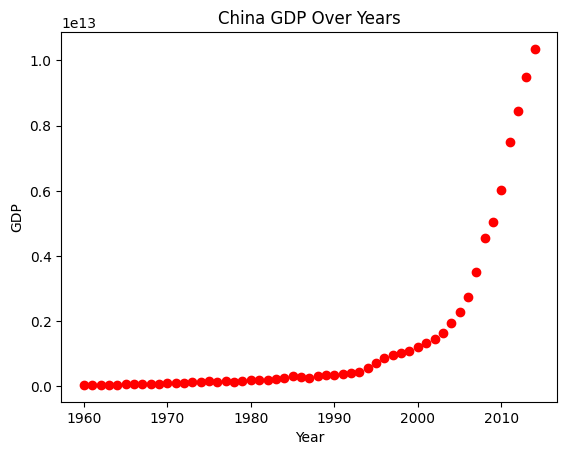

In [ ]:
plt.plot(X, y, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.title("China GDP Over Years")
plt.show()

### Building the model

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
Dense = tf.keras.layers.Dense
Input = tf.keras.layers.Input
Dropout = tf.keras.layers.Dropout
Sequential = tf.keras.models.Sequential
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1, min_lr=1e-6)

In [ ]:
# ANN Model
ann = tf.keras.Sequential([
    Input(shape=(1,)),
    Dense(units=16, activation="tanh"),
    Dropout(0.2),
    Dense(units=8, activation="tanh"),
    Dropout(0.2),
    Dense(units=1)
])

ann.compile(optimizer=optimizer, loss="mean_squared_error")

In [ ]:
ann.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = ann.fit(X_train, y_train, epochs=100, batch_size=32,
                  validation_data=(X_test, y_test), verbose=0, callbacks=[early_stopping, TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

## Model evaluation

In [ ]:
# Error Metrics
predictions = ann.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
MAE: 0.12332281440932084, MSE: 0.04297519505402689, RMSE: 0.2073045948695467, R-squared: 0.3060210867584646


In [ ]:
predictions = scaler_y.inverse_transform(predictions)
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

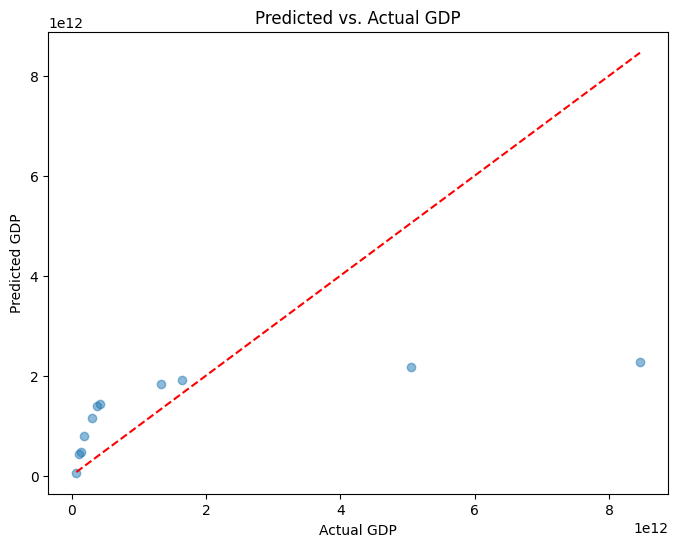

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line for perfect predictions
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")
plt.title("Predicted vs. Actual GDP")
plt.show()

# Imagenary Data

In [ ]:
imaginary_data = np.array([
    [15, 70, 1015, 60],
    [25, 60, 1010, 50],
    [35, 50, 1005, 40]
])
scaled_imaginary_data = scaler.transform(imaginary_data)

ValueError: X has 4 features, but StandardScaler is expecting 1 features as input.

In [ ]:
imaginary_predictions = ann.predict(scaled_imaginary_data)
print("Imaginary Data Predictions:")
for i, pred in enumerate(imaginary_predictions):
    print(f"Input {i+1}: {imaginary_data[i]} => Predicted Output: {pred[0]:.2f} kW")

# Emphasizing Variables That Greatly Affect Predictions

In [ ]:
corr = df.corr()["Net Hourly Electrical Energy Output"].sort_values(ascending=False)
print(corr)

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
print("Median of the Target:")
print(df['Net Hourly Electrical Energy Output'].median())

In [ ]:
# Establish Baseline
baseline_values = np.array([[
    df['Average Temperature'].median(),
    df['Exhaust Vacuum'].median(),
    df['Ambient Pressure'].median(),
    df['Relative Humidity'].median()
]])
print("Baseline Values")
for feature, value in zip(df.columns[:-1], baseline_values[0]):  # Exclude the target column
    print(f"{feature}: {value:.2f}")

In [ ]:
# Adjusted test data
imaginary_data = np.array([
    [baseline_values[0][0] * 1.50, baseline_values[0][1], baseline_values[0][2], baseline_values[0][3]],  # Temp
    [baseline_values[0][0], baseline_values[0][1] * 1.50, baseline_values[0][2], baseline_values[0][3]],  # Vacuum
    [baseline_values[0][0] * 1.50, baseline_values[0][1] * 1.50, baseline_values[0][2], baseline_values[0][3]],  # Both NEGcorr
    [baseline_values[0][0], baseline_values[0][1], baseline_values[0][2] * 1.50, baseline_values[0][3]], # Ambient Pressure
])

print("\nImaginary Test Data:")
for i, row in enumerate(imaginary_data):
    print(f"Scenario {i+1}: {row}")

In [ ]:
scaled_imaginary_data = scaler.transform(imaginary_data)

In [ ]:
scaled_impact_data = scaler.transform(imaginary_data)
impact_predictions = ann.predict(scaled_impact_data)

In [ ]:
predictions = ann.predict(scaled_imaginary_data)

print("\nPredictions for Imaginary Data:")
for i, pred in enumerate(predictions):
    print(f"Scenario {i+1}: Predicted Energy Output = {pred[0]:.2f} kW")

#GUI

https://colab.research.google.com/drive/1BcMwDr6QpyLypoxcG994yaTwNdNdGN8W?usp=sharing#scrollTo=QFiDSIaEo3AO

In [ ]:
temp_input = widgets.FloatText(
    value=25.0,
    description='Temperature:',
    tooltip='Enter the Average Temperature (°C)'
)
vacuum_input = widgets.FloatText(
    value=60.0,
    description='Vacuum:',
    tooltip='Enter the Exhaust Vacuum (hPa)'
)
pressure_input = widgets.FloatText(
    value=1010.0,
    description='Pressure:',
    tooltip='Enter the Ambient Pressure (hPa)'
)
humidity_input = widgets.FloatText(
    value=50.0,
    description='Humidity:',
    tooltip='Enter the Relative Humidity (%)'
)

# Button
predict_button = widgets.Button(
    description="Predict",
    button_style='success',
    tooltip="Click to predict Net Hourly Electrical Energy Output"
)

In [ ]:
output = widgets.Output()

In [ ]:
# prediction
def predict_energy_output(change):
    with output:
        clear_output(wait=True)
        test_data = np.array([[temp_input.value, vacuum_input.value, pressure_input.value, humidity_input.value]])
        scaled_data = scaler.transform(test_data)
        prediction = ann.predict(scaled_data)[0][0]
        print(f"Predicted Net Hourly Electrical Energy Output: {prediction:.2f} kW")

# prediction button
predict_button.on_click(predict_energy_output)

In [ ]:
# the GUI
display(widgets.VBox([
    widgets.Label("Enter the values for the features:"),
    temp_input,
    vacuum_input,
    pressure_input,
    humidity_input,
    predict_button,
    output
]))